In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
import joblib

In [14]:
data = pd.read_csv('IMDB_Dataset.csv')


In [15]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [17]:
data.shape

(50000, 2)

In [18]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [19]:
data["sentiment"].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [20]:
data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)

In [21]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [22]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0
49999,No one expects the Star Trek movies to be high...,0


In [23]:
data["sentiment"].value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

In [26]:
train_data, test_data = train_test_split(data, test_size = 0.2, random_state=42)

In [27]:
train_data.shape

(40000, 2)

In [28]:
test_data.shape

(10000, 2)

In [29]:
tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(train_data["review"])

In [30]:
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"]), maxlen=200)

In [31]:
X_train

array([[1935,    1, 1200, ...,  205,  351, 3856],
       [   3, 1651,  595, ...,   89,  103,    9],
       [   0,    0,    0, ...,    2,  710,   62],
       ...,
       [   0,    0,    0, ..., 1641,    2,  603],
       [   0,    0,    0, ...,  245,  103,  125],
       [   0,    0,    0, ...,   70,   73, 2062]])

In [32]:
X_test

array([[   0,    0,    0, ...,  995,  719,  155],
       [  12,  162,   59, ...,  380,    7,    7],
       [   0,    0,    0, ...,   50, 1088,   96],
       ...,
       [   0,    0,    0, ...,  125,  200, 3241],
       [   0,    0,    0, ..., 1066,    1, 2305],
       [   0,    0,    0, ...,    1,  332,   27]])

In [33]:
Y_train = train_data["sentiment"]
Y_test = test_data["sentiment"]

In [34]:
Y_train

39087    0
30893    0
45278    1
16398    0
13653    0
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: sentiment, Length: 40000, dtype: int64

In [35]:
model = Sequential()
model.add(Embedding(input_dim =5000, output_dim = 128, input_length = 200))
model.add(LSTM(128, dropout=0.2, recurrent_dropout = 0.2))
model.add(Dense(1, activation = "sigmoid"))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 128)          640000    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 771,713
Trainable params: 771,713
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer = "adam", loss="binary_crossentropy", metrics=["accuracy"])

In [38]:
model.fit(X_train, Y_train, epochs = 10, batch_size = 64, validation_split = 0.2)

Epoch 1/10
500/500 [==============================] - 441s 876ms/step - loss: 0.3944 - accuracy: 0.8217 - val_loss: 0.3881 - val_accuracy: 0.8441
Epoch 2/10
500/500 [==============================] - 370s 740ms/step - loss: 0.2704 - accuracy: 0.8923 - val_loss: 0.3200 - val_accuracy: 0.8754
Epoch 3/10
500/500 [==============================] - 345s 690ms/step - loss: 0.2282 - accuracy: 0.9098 - val_loss: 0.3184 - val_accuracy: 0.8796
Epoch 4/10
500/500 [==============================] - 372s 744ms/step - loss: 0.1960 - accuracy: 0.9251 - val_loss: 0.3235 - val_accuracy: 0.8685
Epoch 5/10
500/500 [==============================] - 421s 841ms/step - loss: 0.1617 - accuracy: 0.9400 - val_loss: 0.3317 - val_accuracy: 0.8745
Epoch 6/10
500/500 [==============================] - 444s 889ms/step - loss: 0.1390 - accuracy: 0.9485 - val_loss: 0.3642 - val_accuracy: 0.8783
Epoch 7/10
500/500 [==============================] - 513s 1s/step - loss: 0.1154 - accuracy: 0.9583 - val_loss: 0.4098 - va

In [ ]:
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)
print(classification_report(Y_test, y_pred, target_names=["Negative", "Positive"]))


              precision    recall  f1-score   support

    Negative       0.87      0.88      0.88      4961
    Positive       0.88      0.88      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



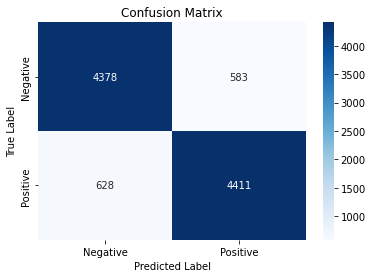

In [55]:
cm = confusion_matrix(Y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [39]:
model.save("lstm_model.h5")

In [42]:

joblib.dump(tokenizer, "tokenizer.pkl")

['tokenizer.pkl']

In [43]:
def predict_sentiment(review):
  sequences = tokenizer.texts_to_sequences([review])
  padded_sequence = pad_sequences(sequences, maxlen=200)
  prediction = model.predict(padded_sequence)
  sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
  return sentiment, prediction[0][0]

In [47]:
example_review = 'The movie was fantastic! acting was great and plot was thrilling'
sentiment, score = predict_sentiment(example_review)

print('review:', example_review)
print('sentiment:', sentiment)
print('score:', score)

review: The movie was fantastic! acting was great and plot was thrilling
sentiment: positive
score: 0.758538
